In [33]:
#for data preprocessing
import pandas as pd

#for matrix math
import numpy as np

#Split data for train and test
from sklearn.model_selection import train_test_split

#Overfitting avoidance
from sklearn import model_selection

#supervised algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

#Standardise data value
from sklearn.preprocessing import StandardScaler

#imbalance data
from imblearn.over_sampling import SMOTE

#for plotting
import seaborn as sns                #style setting
import matplotlib.pyplot as plt      #graph plotting

#style plotting by using seaborn
sns.set_style("darkgrid")

#graph plotting by using matplotlib
%matplotlib inline

#remove warning message
import warnings
warnings.filterwarnings("ignore")

In [35]:
#import dataset used
data = pd.read_csv("Telco_Churn.csv")

#display first 3 rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
#detect missing value in data frame
data.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [9]:
#numerical data (except those in 1,0 or with 3+...)
numericalData = data[["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]]

#print
numericalData.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,LP001002,5849,0.0,NaN,360.0
1,LP001003,4583,1508.0,128.0,360.0
2,LP001005,3000,0.0,66.0,360.0
3,LP001006,2583,2358.0,120.0,360.0
4,LP001008,6000,0.0,141.0,360.0


In [39]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [42]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

In [50]:
numericalData = data[["tenure","MonthlyCharges","TotalCharges"]]

numericalData.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


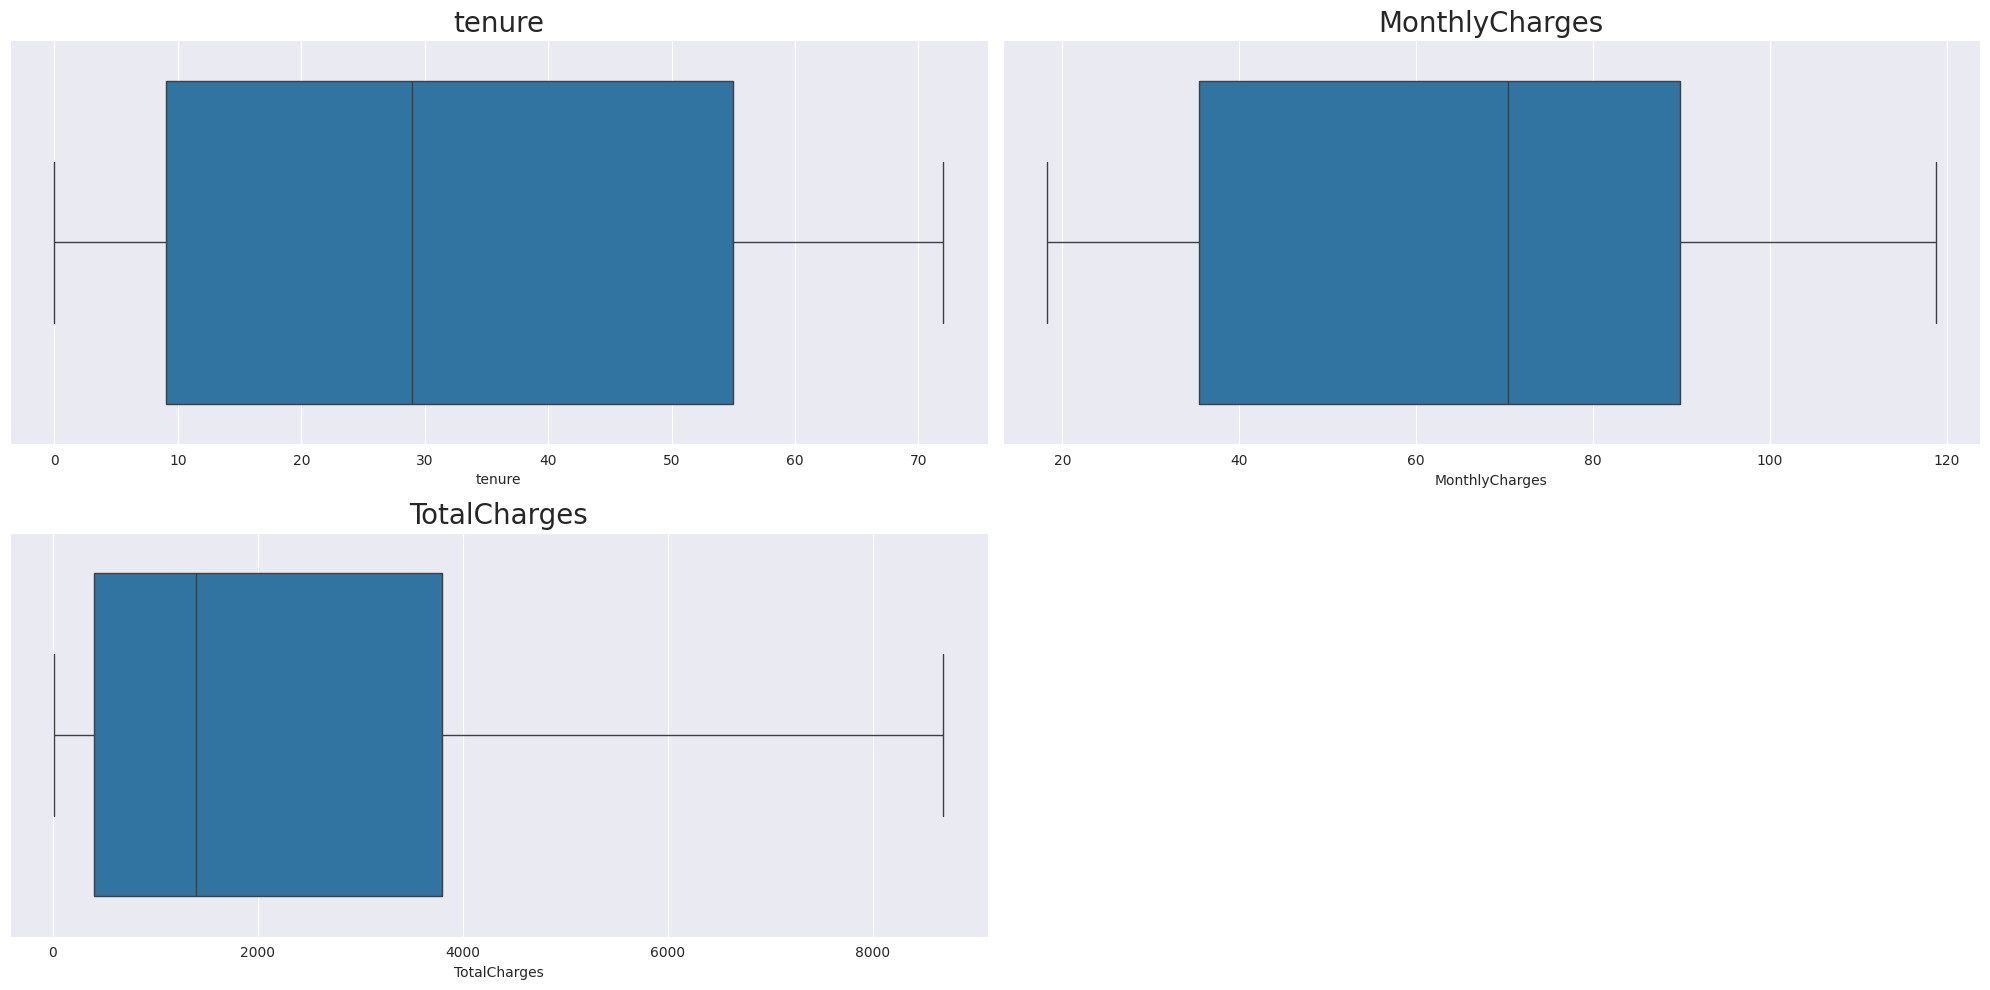

In [43]:
#format the figure size to 20rows,10cols
fig, ax = plt.subplots(figsize = (20,10))


plt.subplot(221)
sns.boxplot(x = data["tenure"])
plt.title("tenure", fontsize = 20)


plt.subplot(222)
sns.boxplot(x = data["MonthlyCharges"])
plt.title("MonthlyCharges", fontsize = 20)

plt.subplot(223)
sns.boxplot(x = data["TotalCharges"])
plt.title("TotalCharges", fontsize = 20)


plt.tight_layout()
plt.show()


In [44]:
#categorical data (those that not in numericalData variable)
categoricalData = data[["customerID","gender","Partner","Dependents","PhoneService","MultipleLines",
                        "InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",
                        "TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling",
                        "PaperlessBilling","PaymentMethod","Churn"]]

#print
categoricalData.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Yes,Electronic check,Yes


In [83]:
GenderNum = pd.Categorical(categoricalData["gender"]).codes
PartnerNum = pd.Categorical(categoricalData["Partner"]).codes
DependentsNum = pd.Categorical(categoricalData["Dependents"]).codes
PhoneServiceNum = pd.Categorical(categoricalData["PhoneService"]).codes
MultipleLinesNum = pd.Categorical(categoricalData["MultipleLines"]).codes
InternetServiceNum = pd.Categorical(categoricalData["InternetService"]).codes
OnlineSecurityNum = pd.Categorical(categoricalData["OnlineSecurity"]).codes
OnlineBackupNum = pd.Categorical(categoricalData["OnlineBackup"]).codes
DeviceProtectionNum = pd.Categorical(categoricalData["DeviceProtection"]).codes
TechSupportNum = pd.Categorical(categoricalData["TechSupport"]).codes
StreamingTVNum = pd.Categorical(categoricalData["StreamingTV"]).codes
StreamingMoviesNum = pd.Categorical(categoricalData["StreamingMovies"]).codes
ContractNum = pd.Categorical(categoricalData["Contract"]).codes
PaperlessBillingNum = pd.Categorical(categoricalData["PaperlessBilling"]).codes
PaymentMethodNum = pd.Categorical(categoricalData["PaymentMethod"]).codes

categoricalData["gender"] = GenderNum
categoricalData["Partner"] = PartnerNum
categoricalData["Dependents"] = DependentsNum
categoricalData["PhoneService"] = PhoneServiceNum
categoricalData["MultipleLines"] = MultipleLinesNum
categoricalData["InternetService"] = InternetServiceNum
categoricalData["OnlineSecurity"] = OnlineSecurityNum
categoricalData["OnlineBackup"] = OnlineBackupNum
categoricalData["DeviceProtection"] = DeviceProtectionNum
categoricalData["TechSupport"] = TechSupportNum
categoricalData["StreamingTV"] = StreamingTVNum
categoricalData["StreamingMovies"] = StreamingMoviesNum
categoricalData["Contract"] = ContractNum
categoricalData["PaperlessBilling"] = PaperlessBillingNum
categoricalData["PaymentMethod"] = PaymentMethodNum

categoricalData.loc[categoricalData['Churn'] == 'Yes','Churn'] = 1
categoricalData.loc[categoricalData['Churn'] == 'No','Churn'] = 0


In [47]:
#print to see is there any columns with null
categoricalData.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaperlessBilling,PaymentMethod,Churn,Gender
0,7590-VHVEG,Female,1,0,0,1,0,0,2,0,0,0,0,0,0,0,2,0,0
1,5575-GNVDE,Male,0,0,1,0,0,2,0,2,0,0,0,1,0,0,3,0,1
2,3668-QPYBK,Male,0,0,1,0,0,2,2,0,0,0,0,0,0,0,3,1,1
3,7795-CFOCW,Male,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0,1
4,9237-HQITU,Female,0,0,1,0,1,0,0,0,0,0,0,0,0,0,2,1,0


In [51]:
#standardize the numerical data
scaler = StandardScaler()
numericalData.iloc[:,1:] =scaler.fit_transform(numericalData.iloc[:,1:])

In [52]:
#print to see the standardized numerical data
numericalData.head()

,tenure,MonthlyCharges,TotalCharges
0,1,-1.160323,-0.994194
1,34,-0.259629,-0.173740
2,2,-0.362660,-0.959649
3,45,-0.746535,-0.195248
4,2,0.197365,-0.940457


In [84]:
#concatenate the categorical data and numerical data together as nwData
nwData = pd.concat([categoricalData,numericalData.iloc[:,1:]],axis=1)
nwData.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaperlessBilling,PaymentMethod,Churn,Gender,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,2,0,...,0,0,0,0,0,2,0,0,-1.160323,-0.994194
1,5575-GNVDE,1,0,0,1,0,0,2,0,2,...,0,0,1,0,0,3,0,1,-0.259629,-0.173740
2,3668-QPYBK,1,0,0,1,0,0,2,2,0,...,0,0,0,0,0,3,1,1,-0.362660,-0.959649
3,7795-CFOCW,1,0,0,0,1,0,2,0,2,...,0,0,1,0,0,0,0,1,-0.746535,-0.195248
4,9237-HQITU,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,2,1,0,0.197365,-0.940457


In [65]:
nwData.describe()

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaperlessBilling,PaymentMethod,Gender,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.0,7043.0,7043.000000,7043.000000,7.043000e+03,7.032000e+03
mean,0.483033,0.299588,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.0,0.0,1.574329,0.504756,-6.406285e-17,8.159318e-17
std,0.499748,0.458110,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.0,0.0,1.068104,0.500013,1.000071e+00,1.000071e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-1.545860e+00,-9.990692e-01
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,-9.725399e-01,-8.302488e-01
50%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.0,2.000000,1.000000,1.857327e-01,-3.908151e-01
75%,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.0,0.0,2.000000,1.000000,8.338335e-01,6.668271e-01
max,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.0,0.0,3.000000,1.000000,1.794352e+00,2.824261e+00


# Modelling #


### Spliting data ###
The data set will be split into training and testing sets. The training set will be used to train the model and testing set will be used to test the model. The data spliting is based on percentage. The training set is 70% of the data set ewhile testing set is 30% of the data set.

### Alogrithms Selected ###
There are total 6 supervised learning algorithms selected to model the dataset in order to find the best modelling technique to solve the business problem which is loan approval automation.
#### 1) Random Forest Classifiers ####
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.<br>

#### 2) Logistics Regression ####
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". <br>

#### 3) Support Vector Classifier (SVC) ####
In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting).<br>

#### 4) K-nearest Neighbors ####
In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:<br>

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.<br>

In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.<br>

#### 5) Gaussian Naive Bayes ####
In machine learning, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features/predictors) in a learning problem. Maximum-likelihood training can be done by evaluating a closed-form expression, which takes linear time, rather than by expensive iterative approximation as used for many other types of classifiers.<br>

#### 6) Decision Tree ####
In computer science, Decision tree learning uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). It is one of the predictive modeling approaches used in statistics, data mining and machine learning. Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

In [66]:
#count the rows with "Y" and "N" in the Loan_Status
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [82]:
nwData.dtypes

customerID           object
gender               object
Partner                int8
Dependents             int8
PhoneService           int8
MultipleLines          int8
InternetService        int8
OnlineSecurity         int8
OnlineBackup           int8
DeviceProtection       int8
TechSupport            int8
StreamingTV            int8
StreamingMovies        int8
Contract               int8
PaperlessBilling       int8
PaperlessBilling       int8
PaymentMethod          int8
Churn                 int64
Gender                 int8
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [85]:
nwData['Churn'] = nwData['Churn'].astype(int)

In [86]:
#drop the Loan_Status and Loan_ID for x variable that is to be used as the feature selections
#choose the Loan_Status as the y variable that acts as the label
#split the x variable and y variable into test set (30%) and train set (70%)
X = nwData.drop(['Churn','customerID'],axis=1)
y = nwData.loc[:,['Churn']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [90]:
#use SMOTE to balance the number of occurrence of "Y" and "N" in y variable
# y_train = y_train.astype(int)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
y_train = imputer.fit_transform(y_train)

sm = SMOTE(sampling_strategy='auto')
X_train, y_train = sm.fit_resample(X_train, y_train)

In [91]:
#confirm the data has been balanced
len(X_test) + len(X_train)

9341

In [93]:
X_test = imputer.fit_transform(X_test)
y_test = imputer.fit_transform(y_test)

#Random Forest algorithm
randomforest = RandomForestClassifier()

#train using the algorithm
randomforest.fit(X_train,y_train)

#use the trained set to do prediction on test set
y_pred=randomforest.predict(X_test)

In [94]:
#print the confucsion matrix, accuracy score, precision and recall
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[1298  262]
 [ 233  320]]
0.7657359204921912
0.5786618444846293
0.5498281786941581
0.5638766519823788


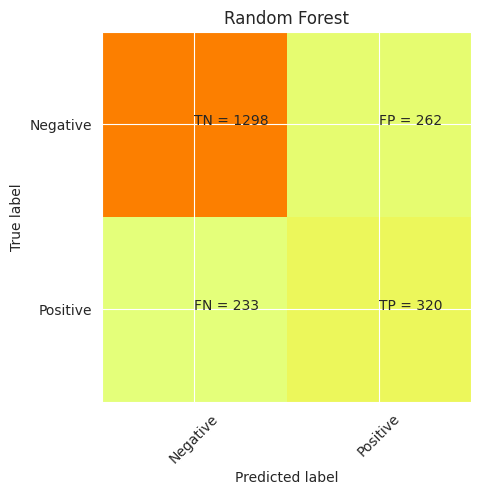

In [95]:
#plot the confusion matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Random Forest')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [96]:
#Logistic Regression algorithm
lr = LogisticRegression()

#train using the algorithm
lr.fit(X_train, y_train)

#use the trained set to do prediction on test set
y_pred = lr.predict(X_test)

In [97]:
#print the confucsion matrix, accuracy score, precision and recall
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[1126  434]
 [ 125  428]]
0.735447231424515
0.7739602169981917
0.4965197215777262
0.604946996466431


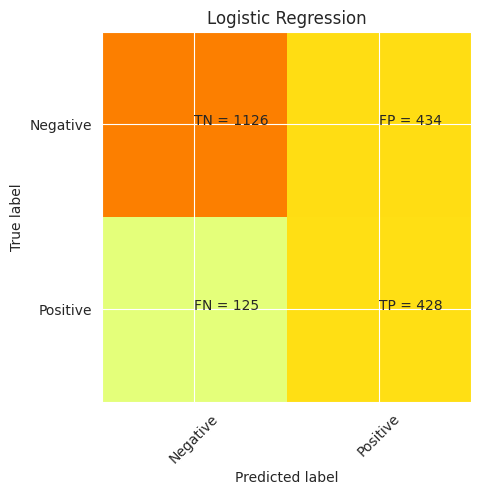

In [98]:
#plot the confusion matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [99]:
#Support Vector Machine algorithm
svc=SVC()

#train using the algorithm
svc.fit(X_train,y_train)

#use the trained set to do prediction on test set
y_pred=svc.predict(X_test)

In [100]:
#print the confucsion matrix, accuracy score, precision and recall
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[1167  393]
 [ 140  413]]
0.7477520113582584
0.7468354430379747
0.5124069478908189
0.6077998528329654


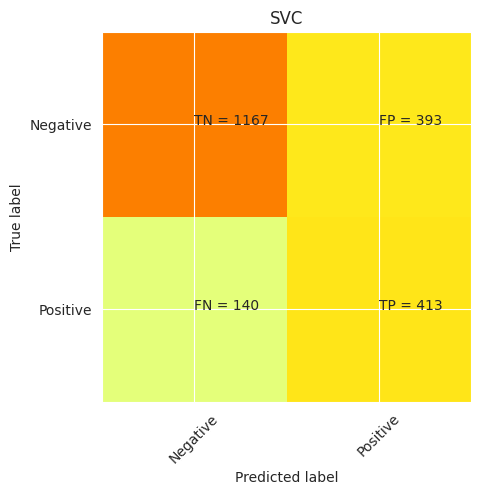

In [101]:
#plot the confusion matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('SVC')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [102]:
#K-Nearest Neighbour algorithm
neigh = KNeighborsClassifier(n_neighbors=3)

#train using the algorithm
neigh.fit(X_train,y_train)

#use the trained set to do prediction on test set
y_pred=neigh.predict(X_test)

In [103]:
#print the confucsion matrix, accuracy score, precision and recall
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[1126  434]
 [ 205  348]]
0.6975863700899195
0.6292947558770343
0.44501278772378516
0.5213483146067415


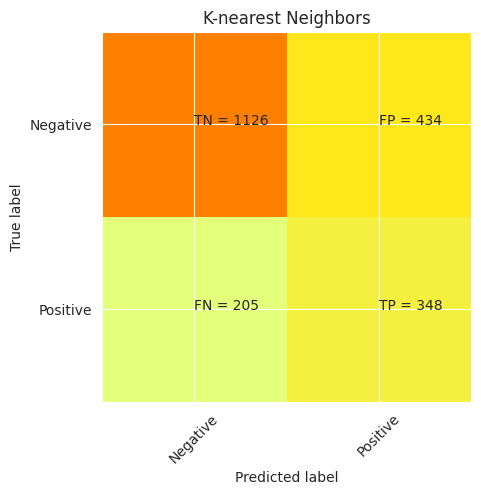

In [104]:
#plot the confusion matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('K-nearest Neighbors')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [105]:
#Gaussian Naive Bayes algorithm
nb = GaussianNB()

#train using the algorithm
nb.fit(X_train,y_train)

#use the trained set to do prediction on test set
y_pred=nb.predict(X_test)

In [106]:
#print the confucsion matrix, accuracy score, precision and recall
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[1130  430]
 [ 138  415]]
0.7311878845243729
0.7504520795660036
0.4911242603550296
0.5937052932761088


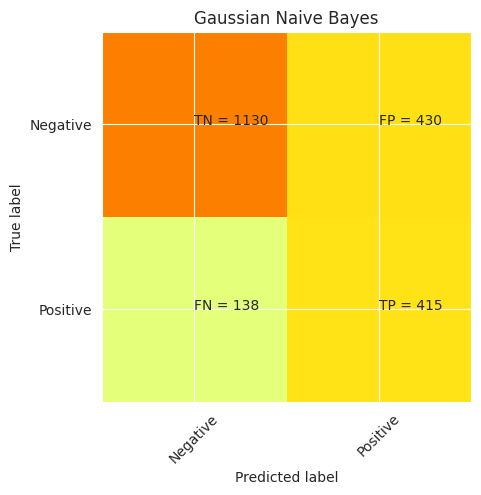

In [107]:
#plot the confusion matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Gaussian Naive Bayes')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [108]:
#Decision Tree algorithm
dt = DecisionTreeClassifier()

#train using the algorithm
dt.fit(X_train,y_train)

#use the trained set to do prediction on test set
y_pred=dt.predict(X_test)

In [109]:
#print the confucsion matrix, accuracy score, precision and recall
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[1230  330]
 [ 250  303]]
0.7255087553241836
0.5479204339963833
0.4786729857819905
0.5109612141652613


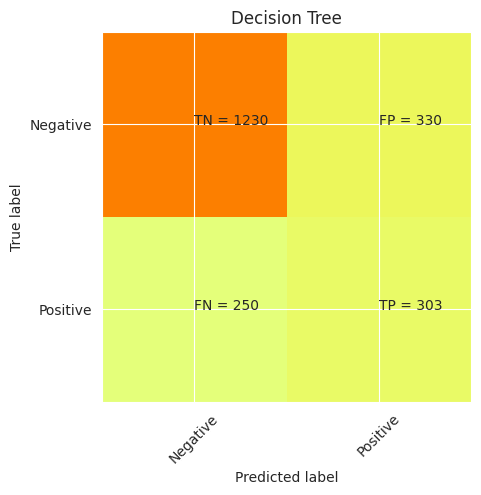

In [110]:
#plot the confusion matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Decision Tree')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# Evaluation #

### Importance of Evaluation Element ###
In this case, it is important to get a low false positive value as it is used to determine the loan eligibility of an individual. If the false positive value is high, which means that the system marked the eligibility of loan borrowing as true while in fact the individual is not eligible for the loan, the company might faced difficulty in collecting the loan borrowed. Thus, the company might faced financial difficulty. Hence, recall is the most important element of evaluation compared to precision and accuracy. It is because precision and accuracy will not affect the financial aspects of the company.

### Accuracy ###
Accuracy is the ratio of correctly predicted observation over the total observations. A high accuracy score cannot directly indicates that the algorithm with a high accuracy perform the best. Precision, recall and F1 score have to be investigated too.

<table style='border:1px solid black'>
  <tr style='font-size: 14px;'>
      <th style='text-align: center;border: 1px solid black;'>Algorithms Used</th>
      <th style='text-align: center;border: 1px solid black;'>Accuracy Score</th>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Logistic Regression</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.8324</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Support Vector Classifier (SVC)</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.8270</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Random Forest Classifier</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.7946</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>K-nearest Neighbors</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.7243</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Gaussian Naive Bayes</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.8216</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Decision Tree Classifier</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.7297</td>
  </tr>
</table>

### Precision ###
Precision measures the ratio of correctly predicted positive observations to the total predicted positive observations. A higher value of precision indicates that the results are predicted accurately. It is important as a method to investigate the performance of an algorithm in predicting the labels.

<table style='border:1px solid black'>
  <tr style='font-size: 14px;'>
      <th style='text-align: center;border: 1px solid black;'>Algorithms Used</th>
      <th style='text-align: center;border: 1px solid black;'>Precision Score</th>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Logistic Regression</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.8199</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Support Vector Classifier (SVC)</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.8148</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Random Forest Classifier</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.8288</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>K-nearest Neighbors</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.7943</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Gaussian Naive Bayes</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.8276</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Decision Tree Classifier</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.8182</td>
  </tr>
</table>


### Recall ###
Recall is the ratio of correctly predicted positive observations to the actual observations. It is useful in measuring the number of false positive values in the observation.

<table style='border:1px solid black'>
  <tr style='font-size: 14px;'>
      <th style='text-align: center;border: 1px solid black;'>Algorithms Used</th>
      <th style='text-align: center;border: 1px solid black;'>Recall Score</th>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Logistic Regression</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9851</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Support Vector Classifier (SVC)</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9851</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Random Forest Classifier</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9030</td>
  </tr>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>K-nearest Neighbors</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.8358</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Gaussian Naive Bayes</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.9701</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Decision Tree Classifier</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.8060</td>
  </tr>
</table>


### F1 Score ###
F1 Score is the weighted average of precision and recall. Therefore, this score takes both false positives and false negatives into account. It is a preferred method than accuracy score. F1 Score might be a better measure to use if we need to seek a balance between precision and recall.

<table style='border:1px solid black'>
  <tr style='font-size: 14px;'>
      <th style='text-align: center;border: 1px solid black;'>Algorithms Used</th>
      <th style='text-align: center;border: 1px solid black;'>F1 Score</th>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Logistic Regression</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.8949</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Support Vector Classifier (SVC)</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.8919</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Random Forest Classifier</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.8643</td>
  </tr>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>K-nearest Neighbors</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.8145</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Gaussian Naive Bayes</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.8874</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Decision Tree Classifier</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.8120</td>
  </tr>
</table>


# Deployment #

### Pros and Cons of Alogrithms Used ###
#### 1) Random Forest Classifier ####
#### Pros ####
- A single decision tree tends to overfit the data. Hence, random forest (the process of averaging or combining the results of different decision trees) helps to overcome the problem of overfitting.
- It has less variance than a single decision tree. It means that it works correctly for a large range of data items than single decision trees.

#### Cons ####
- It has high complexity as it is much harder and time-consuming to construct than decision trees.
- It requires more computational resources and are also less intuitive. When you have a large collection of decision trees it is hard to have an intuitive grasp of the relationship existing in the input data.

<hr style='border-color: black;'>

#### 2) Logistics Regression ####
#### Pros ####
- It is very efficient as it does not require too many computational resources.
- It is highly interpretable, it doesn’t require input features to be scaled, it doesn’t require any tuning, it’s easy to regularize, and it outputs well-calibrated predicted probabilities.

#### Cons ####
- Cannot solve non-linear problems with logistic regression since it’s decision surface is linear.

<hr style='border-color: black;'>

#### 3) Support Vector Machine (SVM) ####
#### Pros ####
- It is really effective in the higher dimension when the number of features are more than training examples.
- The hyperplane is affected by only the support vectors thus outliers have less impact.

#### Cons ####
- For larger dataset, it requires a large amount of time to process. In other word, it is less efficient.
- Selecting, appropriately hyperparameters of the SVM that will allow for sufficient generalization performance.

<hr style='border-color: black;'>

#### 4) K-nearest neighbors (KNN)  ####
#### Pros ####
- K-NN algorithm is very simple to understand and equally easy to implement. To classify the new data point K-NN algorithm reads through whole dataset to find out K nearest neighbors.
- K-NN is a non-parametric algorithm which means there are assumptions to be met to implement K-NN. Parametric models like linear regression has lots of assumptions to be met by data before it can be implemented which is not the case with K-NN.

#### Cons ####
- K-NN might be very easy to implement but as dataset grows efficiency or speed of algorithm declines very fast.
- K-NN doesn’t perform well on imbalanced data. If we consider two classes, A and B, and the majority of the training data is labeled as A, then the model will ultimately give a lot of preference to A. This might result in getting the less common class B wrongly classified.

<hr style='border-color: black;'>
<hr style='border-color: black;'>


#### 5) Gaussian Naive Bayes  ####
#### Pros ####
- It is easy and fast to predict class of test data set. It also perform well in multi class prediction
- When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.

#### Cons ####
- If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.
- Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

<hr style='border-color: black;'>

#### 6) Decision Tree  ####
#### Pros ####
- Easy to understand and interpret, perfect for visual representation. This is an example of a white box model, which closely mimics the human decision-making process.
- Can work with numerical and categorical features.

#### Cons ####
- Overfitting occurs when the algorithm captures noise in the dataset.
- An The prediction model gets unstable with a very small variance in data.
- A highly complicated Decision tree tends to have a low bias which makes it difficult for the model to work with new data.

<hr style='border-color: black;'>
<hr style='border-color: black;'>


### Result ###
As the values of recall for Logistic Regression algorithm and SVC algorithm are both 0.9851, therefore the values of precision will be used to determine the algorithm chosen. As Logistic Regression have a precision of 0.8199, F1 score of 0.8949 and accuracy of 0.8324 which are the highest compared to SVC, so it will be chosen in implementation.

### Overfitting Test ###
Usually after the data spliting process, the model performance will then evaluated based on an error metric to determine the accuracy of the model. This method however is not very reliable as the accuracy obtained for one test set can be very different to the accuracy obtained for a different test set. Hence, K-fold Cross Validation(CV) is used to provide a solution to this problem by dividing the data into folds and ensuring that each fold is used as a testing set at some point. It is found out that the accuracy of using Logistics Regression is 80.946% ,which is consider as high accuracy. In other word, the model used to train and predict is not overfitting.

### Limitation ###
The number of data or observation is consider as little, so it will have low accuracy compared to high number of data. Besides, there are many machine learning algorithms available, but only 6 of them are tested, so maybe there is a better machine learning algorithm to be implemented that has not been tested and applied.


In [ ]:
model = LogisticRegression()
kfold = model_selection.KFold(n_splits=5)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.3f%% " % (results.mean()*100.0))
print("Standard deviation: %.3f%% " % (results.std()*100.0))

Accuracy: 80.784% 
Standard deviation: 2.638% 
